<a href="https://colab.research.google.com/github/doommodery/neural/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965_%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D1%8B_%D0%9D%D0%A1_%D0%B8_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Использование предобученной модели

### 1.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
# Ваш код
model = keras.applications.ResNet50V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="resnet50v2",
)

model.summary()

102869336/102869336 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 25,613,800 (97.71 MB)

 Trainable params: 25,568,360 (97.54 MB)

 Non-trainable params: 45,440 (177.50 KB)

### 1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в [списке](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), и сохраните их представление в список images

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import cv2
import numpy as np

images = []

image_paths = [
    '/content/drive/MyDrive/lab5/Chainsaw.jpg',
    '/content/drive/MyDrive/lab5/Golf_Ball.jpg',
    '/content/drive/MyDrive/lab5/cannon.jpg',
    '/content/drive/MyDrive/lab5/canoe.jpg',
    '/content/drive/MyDrive/lab5/poncho.jpg'
]

for path in image_paths:
    img = cv2.imread(path)
    if img is None:
        print(f"Warning: Could not read image at {path}")
        continue  # Skip this image
    img = cv2.resize(img, (320, 320))
    images.append(img)

if not images:
    print("Error: No images were loaded successfully")
else:
    images = np.array(images)
    print("Successfully loaded images with shape:", images.shape)

Successfully loaded images with shape: (4, 320, 320, 3)


In [11]:
images = []

img_1 = cv2.imread('/content/drive/MyDrive/lab5/Chainsaw.jpg')
img_1 = cv2.resize(img_1, (320, 320))

img_2 = cv2.imread('/content/drive/MyDrive/lab5/printer.jpg')
img_2 = cv2.resize(img_2, (320, 320))

img_3 = cv2.imread('/content/drive/MyDrive/lab5/cannon.jpg')
img_3 = cv2.resize(img_3, (320, 320))

img_4 = cv2.imread('/content/drive/MyDrive/lab5/canoe.jpg')
img_4 = cv2.resize(img_4, (320, 320))

img_5 = cv2.imread('/content/drive/MyDrive/lab5/poncho.jpg')
img_5 = cv2.resize(img_5, (320, 320))

images.append(img_1)
images.append(img_2)
images.append(img_3)
images.append(img_4)
images.append(img_5)
images = np.array(images)

images.shape

(5, 320, 320, 3)

### 1.3. Напишите функцию, принимающую на вход список с исходными изображениями и возвращающую список с преобразованными изображениями под формат входных данных выбранной Вами модели СНС (нормализация).

(Не забудьте создать независимую копию исходного списка в теле функции, для обработки именно независимой копии, а не оригинального списка)

In [12]:
# Ваш код
def normalize(images, shape):
  proc_images = []
  for image in images:
    proc_image = cv2.resize(image, (shape[0], shape[1]))
    proc_image = proc_image.reshape(shape[0], shape[1], shape[2])
    proc_images.append(proc_image)
  proc_images = np.array(proc_images)

  return proc_images

input_images = normalize(images, (224, 224, 3))

input_images = keras.applications.resnet_v2.preprocess_input(input_images)

input_images.shape

(5, 224, 224, 3)

### 1.5. Выведите изображения и соответствующие им классы (как в примере из теории)

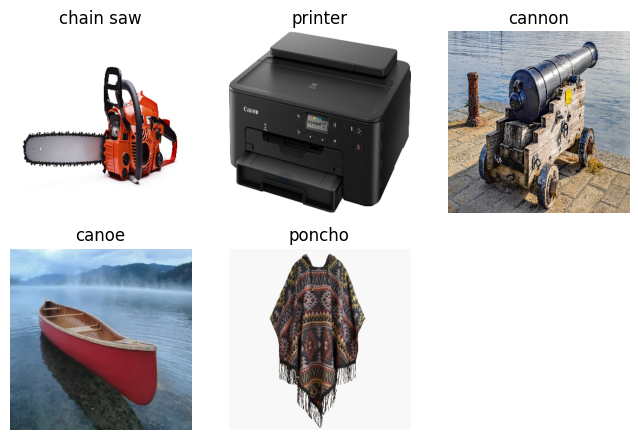

In [14]:
# Ваш код
class_name = ['chain saw', 'printer', 'cannon', 'canoe', 'poncho']

plt.figure(figsize=(8, 8))
for i in range(5):
  image = images[i]
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[:, :, ::-1])
  plt.title(class_name[i])
  plt.axis("off")

In [15]:
res = model.predict(input_images)
for i in res:
  print(np.argmax(i))

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
491
742
471
472
735


In [16]:
res.shape

(5, 1000)

In [17]:
true_res = keras.applications.resnet_v2.decode_predictions(res, top=3)
for i in range(5):
  print(true_res[i])

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
[('n03000684', 'chain_saw', np.float32(1.0)), ('n02951585', 'can_opener', np.float32(8.129223e-10)), ('n04133789', 'sandal', np.float32(4.978781e-10))]
[('n04004767', 'printer', np.float32(0.5853023)), ('n02988304', 'CD_player', np.float32(0.35665604)), ('n04041544', 'radio', np.float32(0.040726718))]
[('n02950826', 'cannon', np.float32(0.9997812)), ('n04008634', 'projectile', np.float32(4.7125894e-05)), ('n04428191', 'thresher', np.float32(2.8248085e-05))]
[('n02951358', 'canoe', np.float32(0.999368)), ('n03873416', 'paddle', np.float32(0.0005068282)), ('n04483307', 'trimaran', np.float32(2.0530615e-05))]
[('n03980874', 'poncho', np.float32(0.9987305)), ('n04325704', 'stole', np.float32(0.0012550736)), ('n04599235', 'wool', np.float32(1.15416e-05))]


# Задание 2. Использование обученной модели для работы со своим датасетом

### 2.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [18]:
# Ваш код
basic_model = keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(128, 128, 3),
    pooling='avg',
)

basic_model.summary()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 32, 32, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 32, 32, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 34, 34, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

### 2.2. Подготовка тренировочных данных. Разделение на обучающую и тестовую выборку

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import os
import zipfile
import random
from imutils import paths

# Путь к ZIP-архиву
zip_path = '/content/drive/MyDrive/animals.zip'

# Временная директория для извлечения файлов
extract_path = '/content/animals_extracted'

# Создаем временный каталог, если он не существует
os.makedirs(extract_path, exist_ok=True)

# Словарь для переименования папок
translate = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "scoiattolo": "squirrel",
    "ragno": "spider"
}

# Открываем ZIP-архив
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Получаем список всех файлов в архиве
    file_list = zip_ref.namelist()

    # Фильтруем файлы, которые находятся в папке raw-img
    raw_img_files = [f for f in file_list if f.startswith('raw-img/') and not f.endswith('/')]

    # Обрабатываем каждый файл
    for file in raw_img_files:
        # Извлекаем имя папки (животного) из пути
        folder_name = file.split('/')[1]  # Например, "cane", "gatto" и т.д.

        # Переименовываем папку, если это необходимо
        if folder_name in translate:
            new_folder_name = translate[folder_name]
        else:
            new_folder_name = folder_name  # Если папка не в словаре, оставляем как есть

        # Создаем папку для животного, если она еще не существует
        animal_folder_path = os.path.join(extract_path, new_folder_name)
        os.makedirs(animal_folder_path, exist_ok=True)

        # Извлекаем файл в соответствующую папку
        zip_ref.extract(file, animal_folder_path)
        print(f"Extracted '{file}' to '{animal_folder_path}'")

# Список для хранения путей к изображениям
imagesPath = []

# Проходим по всем папкам с животными
for animal_folder in os.listdir(extract_path):
    folder_path = os.path.join(extract_path, animal_folder)

    # Получаем список файлов в папке
    files = list(paths.list_images(folder_path))

    # Ограничиваем количество файлов до 200
    if len(files) > 400:
        files = files[:400]

    # Добавляем файлы в общий список
    imagesPath.extend(files)

# Перемешиваем список путей к изображениям
random.shuffle(imagesPath)

# Теперь imagesPath содержит пути к 200 файлам из каждой папки
print(f"Total images: {len(imagesPath)}")

Выходные данные были обрезаны до нескольких последних строк (5000).
Extracted 'raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragn

In [21]:
'''
from imutils import paths
import random

imagesPath = sorted(list(paths.list_images('/content/animals/')))
random.shuffle(imagesPath)
'''

import pathlib

imagesPath = pathlib.Path('/content/animals_extracted/')

In [22]:
# Ваш код
img_h, img_w = 128, 128
batch_size = 54

def preprocess(ds):
    return ds.map(lambda x, y: (keras.applications.resnet_v2.preprocess_input(x), y))

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    imagesPath,
    validation_split=0.2,
    subset='training',
    seed=420,
    image_size=(img_h, img_w),
    batch_size=batch_size
)
class_names = train_ds.class_names

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    imagesPath,
    validation_split=0.2,
    subset='validation',
    seed=420,
    image_size=(img_h, img_w),
    batch_size=batch_size
)

train_ds = preprocess(train_ds)
val_ds = preprocess(val_ds)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


In [23]:
print(class_names)

['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


### 2.3. Обучение своей модели на основе предобученной модели "ResNet50V2"

In [24]:
for layer in basic_model.layers:
  layer.trainable = False

In [26]:
# Ваш код
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input

input_tensor = basic_model.input
x = basic_model.output

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output_tensor = Dense(10, activation='softmax')(x)

my_new_model = Model(inputs=input_tensor, outputs=output_tensor)

my_new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 32, 32, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 32, 32, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 34, 34, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 24,619,018 (93.91 MB)

 Trainable params: 1,054,218 (4.02 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [27]:
my_new_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5)
checkpoint = ModelCheckpoint(filepath="resnet50v2_best.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

In [29]:
history = my_new_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 60s 125ms/step - accuracy: 0.8123 - loss: 0.7514 - val_accuracy: 0.8814 - val_loss: 0.3719
Epoch 2/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 51s 61ms/step - accuracy: 0.9210 - loss: 0.2347 - val_accuracy: 0.8884 - val_loss: 0.3774
Epoch 3/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.9492 - loss: 0.1434 - val_accuracy: 0.8871 - val_loss: 0.3973
Epoch 4/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9702 - loss: 0.0877 - val_accuracy: 0.8810 - val_loss: 0.4542
Epoch 5/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.9770 - loss: 0.0642 - val_accuracy: 0.8976 - val_loss: 0.4601
Epoch 6/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 35s 91ms/step - accuracy: 0.9850 - loss: 0.0466 - val_accuracy: 0.8898 - val_loss: 0.5400


### 2.4. Визуализация процесса обучения модели

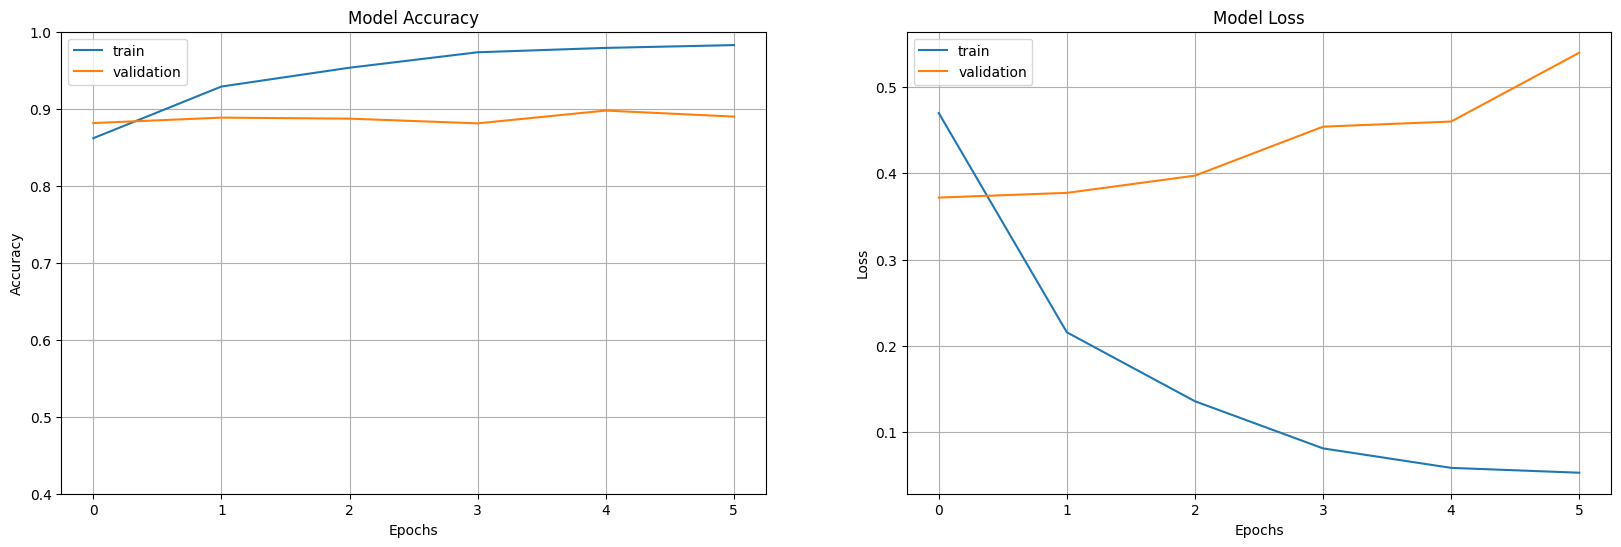

In [30]:
# Ваш код
plt.figure(figsize=(20, 6))

ax = plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

ax = plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

plt.show()

### 2.5. Подготовьте набор проверочных данных (examples)

In [ ]:
# Изображения загружены с устройства во временную среду

### 2.6. Реализуйте графический интерфейс для взаимодействия с обученной моделью, используя [Gradio](https://www.gradio.app/guides/image-classification-in-tensorflow). В качестве примеров (параметр examples в Gradio), используйте изображения из подготовленных проверочных данных (п.2.5)

In [31]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.7 MB/s eta 0:00:00


In [32]:
def classify(image):
  labels = ['butterfly','cat','chicken','cow', 'dog', 'elephant','horse','sheep','spider','squirrel']
  image_resized = cv2.resize(image, (128, 128))
  image = np.expand_dims(image_resized,axis=0)
  image = keras.applications.resnet_v2.preprocess_input(image)
  preds = my_new_model.predict(image).flatten()
  confidences = {labels[i]: float(preds[i]) for i in range(len(preds))}

  return confidences

In [33]:
# Ваш код
import gradio as gr

interface = gr.Interface(
    fn=classify,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(class_names)), # Выходные данные: топ-N классов с наибольшей вероятностью
    examples=["/content/animals_extracted/butterfly/raw-img/farfalla/OIP--04ndbWy7I04gsPgu9qOeQHaHs.jpeg",
              "/content/drive/MyDrive/animals/cat/3.jpeg",
              "/content/animals_extracted/chicken/raw-img/gallina/1001.jpeg",
              "/content/drive/MyDrive/animals/cow/OIP-_2Il44HQzZrQQwqKl7oUOwHaFj.jpeg",
              "/content/drive/MyDrive/animals/dog/OIP-_3S-iEDMQnko7ZHgq_FTcwHaEL.jpeg",
              "/content/animals_extracted/elephant/raw-img/elefante/OIP--3aF2OpzGKcdI6FHil50qQHaFj.jpeg",
              "/content/animals_extracted/horse/raw-img/cavallo/OIP--1iQSsCUgn4E10K_tST_QwHaHa.jpeg",
              "/content/animals_extracted/sheep/raw-img/pecora/OIP--8g1WpakEbcvQVK2QzzNgQHaEZ.jpeg",
              "/content/animals_extracted/spider/raw-img/ragno/OIP--8CNJSaiNQEfqsZDtw-TvQAAAA.jpeg",
              "/content/animals_extracted/squirrel/raw-img/scoiattolo/OIP--9CxJkCleiNXywWpQhEUDAHaE7.jpeg"
              ])

# Запускаем интерфейс
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4227957418190fe7d2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Задание 3. Классификация набора пространственных данных EuroSat (для магистров)

- Ссылка на датасет: https://github.com/phelber/eurosat

- Описание на kaggle: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset

В этом задании Вам будет предоставлен набор данных EuroSat, который содержит снимки земной поверхности, снятые спутником Sentinel-2. Вам нужно будет обучить модель для классификации этих изображений на 10 классов, представляющих различные типы земного покрова.

### **3.1. Загрузка данных:**
  * [Скачайте](https://madm.dfki.de/files/sentinel/EuroSAT.zip) набор данных EuroSat
  * Разделите данные на обучающую, валидационную и тестовую выборки.



In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
%%capture
!unzip EuroSAT.zip -d eurosat

In [46]:
from imutils import paths
import random

imagesPath = sorted(list(paths.list_images('/content/eurosat/2750')))
random.shuffle(imagesPath)

In [47]:
def load_images(imagePaths):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

data, labels = load_images(imagesPath)

In [48]:
data = np.array(data)
labels = np.array(labels)

data.shape

(27000, 64, 64, 3)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

data_n = keras.applications.vgg16.preprocess_input(data)

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.05)
(X_train, X_val, Y_train, Y_val) = train_test_split(X_train, Y_train, test_size=0.3)

lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_val = lb.transform(Y_val)
Y_test = lb.transform(Y_test)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(17955, 64, 64, 3)
(7695, 64, 64, 3)
(1350, 64, 64, 3)


In [50]:
Y_train[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

### **3.2. Выбор архитектуры нейронной сети:**
  * Выберите архитектуру нейронной сети, основанную на трансферном обучении, например, ResNet50, VGG16 или InceptionV3 ([полный список](https://keras.io/api/applications/)).
  * Загрузите предобученную модель выбранной архитектуры.


In [51]:
vgg_model = keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(64, 64, 3),
    pooling='avg',
)

for layer in vgg_model.layers:
  layer.trainable = False

vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

### **3.3. Дообучение модели:**
  * Добавьте к предобученной модели несколько слоев для классификации изображений EuroSat.
  * Обучите модель на обучающей выборке.

In [52]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input

input_tensor = vgg_model.input
x = vgg_model.output

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
output_tensor = Dense(10, activation='softmax')(x)

my_model = Model(inputs=input_tensor, outputs=output_tensor)

my_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │              

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [53]:
my_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [54]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5)
checkpoint = ModelCheckpoint(filepath="vgg_best.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

In [55]:
vgg_history = my_model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=57, epochs=20, callbacks=[early_stopping, checkpoint])

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.7288 - loss: 1.5877 - val_accuracy: 0.8558 - val_loss: 0.6035
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8949 - loss: 0.3572 - val_accuracy: 0.8719 - val_loss: 0.5066
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.9227 - loss: 0.2316 - val_accuracy: 0.8795 - val_loss: 0.4773
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.9442 - loss: 0.1617 - val_accuracy: 0.8758 - val_loss: 0.5294
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.9514 - loss: 0.1352 - val_accuracy: 0.8894 - val_loss: 0.4646
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.9685 - loss: 0.0897 - val_accuracy: 0.8886 - val_loss: 0.5098
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9753 - loss: 0.0766 - val_accuracy: 0.8841 - val_loss: 0.5310
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9770 - loss: 0.0727 - 



### **3.4. Оценка модели:**
  * Оцените производительность модели на валидационной и тестовой выборках.
  * Сравните результаты с другими архитектурами нейронных сетей.



In [56]:
from sklearn.metrics import classification_report

predictions = my_model.predict(X_val, batch_size=32)
print(classification_report(Y_val.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

241/241 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step
                      precision    recall  f1-score   support

          AnnualCrop       0.93      0.91      0.92       864
              Forest       0.94      0.97      0.95       854
HerbaceousVegetation       0.87      0.88      0.88       868
             Highway       0.80      0.75      0.77       727
          Industrial       0.89      0.93      0.91       747
             Pasture       0.88      0.85      0.87       563
       PermanentCrop       0.86      0.75      0.80       690
         Residential       0.92      0.93      0.93       839
               River       0.78      0.88      0.83       704
             SeaLake       0.96      0.97      0.96       839

            accuracy                           0.89      7695
           macro avg       0.88      0.88      0.88      7695
        weighted avg       0.89      0.89      0.89      7695



241/241 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step


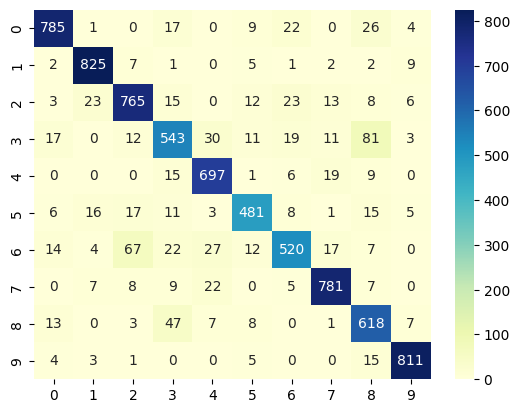

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = my_model.predict(X_val, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_val = Y_val.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

In [58]:
predictions = my_model.predict(X_test, batch_size=32)
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step
                      precision    recall  f1-score   support

          AnnualCrop       0.87      0.90      0.89       134
              Forest       0.92      0.95      0.94       154
HerbaceousVegetation       0.89      0.88      0.89       172
             Highway       0.79      0.68      0.73       119
          Industrial       0.91      0.95      0.93       135
             Pasture       0.85      0.89      0.87       104
       PermanentCrop       0.85      0.74      0.79       125
         Residential       0.99      0.93      0.96       150
               River       0.77      0.90      0.83       118
             SeaLake       0.96      0.99      0.98       139

            accuracy                           0.89      1350
           macro avg       0.88      0.88      0.88      1350
        weighted avg       0.89      0.89      0.89      1350



43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


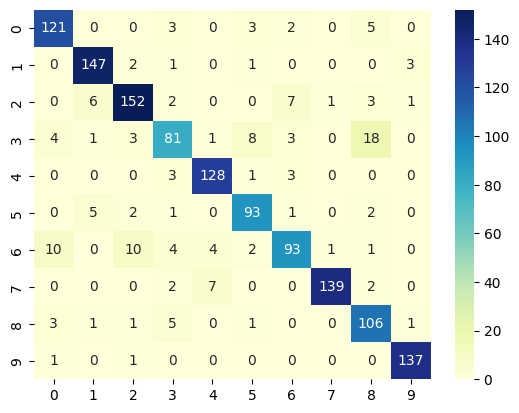

In [59]:
# Получим прогнозы по тестовым даннным
Y_pred = my_model.predict(X_test, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_test = Y_test.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_test, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

### **3.5. Анализ результатов:**
  * Проанализируйте влияние различных параметров на производительность модели, таких как:
      * Количество эпох обучения
      * Размер пакета
      * Функция активации
      * Оптимизатор
      * Регуляризация

## Ваш вывод

- **Количество эпох**  
  Чрезмерное количество эпох может привести к переобучению модели. Поэтому важно тщательно подбирать их число или применять раннюю остановку обучения (*EarlyStopping*).

- **Размер пакета (Batch Size)**  
  Следует выбирать не слишком маленькие и не слишком большие значения, чтобы оптимизировать скорость обучения. Оптимальными считаются степени двойки (например, 32, 64).

- **Функция активации**  
  Выбор зависит от назначения слоя и всей модели. В скрытых слоях для задач классификации часто используется *ReLU*, а на выходном слое — *softmax* (для многоклассовой классификации).

- **Оптимизатор**  
  Выбор зависит от объема данных, однако наиболее распространенным и оптимальным вариантом является *Adam*.

- **Регуляризация**  
  - *Dropout* помогает бороться с переобучением, отключая случайные нейроны в процессе обучения.  
  - *BatchNormalization* ускоряет обучение и особенно эффективен в глубоких нейросетях.

- **Выбор параметров**  
  Оптимальные значения параметров зависят от конкретной задачи и экспериментальных результатов. Полезно тестировать различные варианты или анализировать решения аналогичных задач.
